In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Load the data
ratings = pd.read_csv('u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
movies = pd.read_csv('u.item', sep='|', encoding='latin-1', 
                     names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 
                            'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 
                            'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 
                            'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])

In [34]:
# Merge ratings and movies data
data = pd.merge(ratings, movies, left_on='item_id', right_on='movie_id')

In [35]:
# Aggregate ratings
agg_data = data.groupby('movie_id').agg({
    'rating': ['mean', 'count']
}).reset_index()
agg_data.columns = ['movie_id', 'avg_rating', 'rating_count']

In [36]:
# Add genre data
genres = movies.iloc[:, 5:]  # Select genre columns
agg_data = pd.concat([agg_data, genres], axis=1)

In [37]:
# Preprocessing: Scale numerical data and keep genres
scaler = StandardScaler()
scaled_features = scaler.fit_transform(agg_data[['avg_rating', 'rating_count']])
processed_data = np.hstack((scaled_features, agg_data.iloc[:, 3:].values))  # Combine scaled and genre features

In [38]:
# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(processed_data)
agg_data['kmeans_cluster'] = kmeans_labels

/Users/rjwright/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


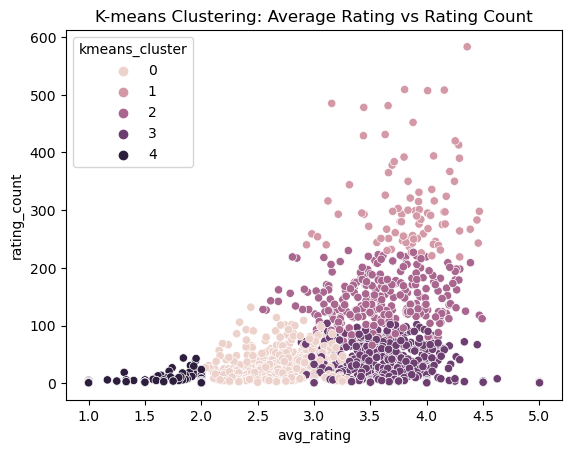

In [39]:
# Visualization: Average rating vs rating count
sns.scatterplot(x='avg_rating', y='rating_count', hue='kmeans_cluster', data=agg_data)
plt.title('K-means Clustering: Average Rating vs Rating Count')
plt.show()

In [40]:
# Agglomerative clustering
# agglo = AgglomerativeClustering(n_clusters=5)
# agglo_labels = agglo.fit_predict(processed_data)
# agg_data['agglo_cluster'] = agglo_labels

In [41]:
# Dendrogram for Agglomerative
# from scipy.cluster.hierarchy import dendrogram, linkage
# linkage_matrix = linkage(processed_data, method='ward')
# plt.figure(figsize=(10, 7))
# dendrogram(linkage_matrix)
# plt.title('Agglomerative Clustering Dendrogram')
# plt.show()

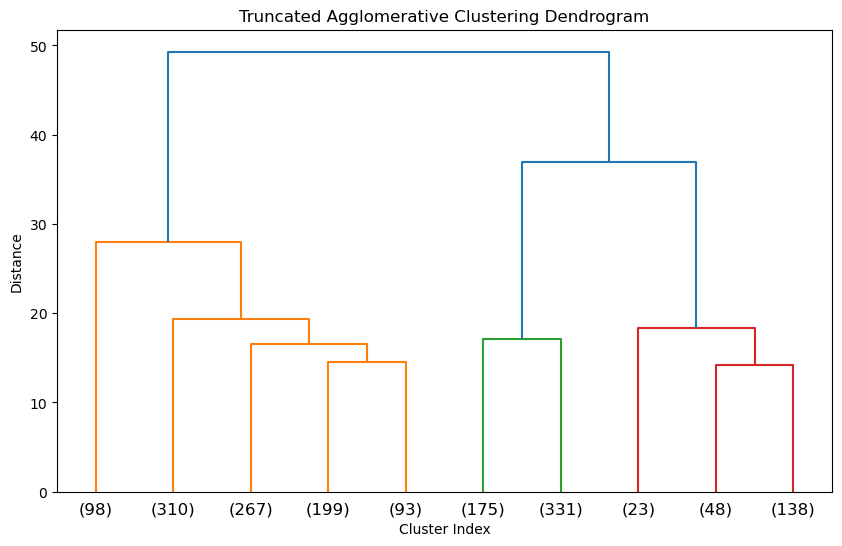

In [42]:
# Generate the linkage matrix
linkage_matrix = linkage(processed_data, method='ward')

# Create a truncated dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, show_leaf_counts=True)
plt.title('Truncated Agglomerative Clustering Dendrogram')
plt.xlabel('Cluster Index')
plt.ylabel('Distance')
plt.show()

In [43]:
# Evaluate clustering
kmeans_score = silhouette_score(processed_data, kmeans_labels)
agglo_score = silhouette_score(processed_data, agglo_labels)
print(f"K-means Silhouette Score: {kmeans_score}")
print(f"Agglomerative Silhouette Score: {agglo_score}")

K-means Silhouette Score: 0.172827981437807
Agglomerative Silhouette Score: 0.10737025734054946
